<a href="https://colab.research.google.com/github/TrzeciakPiotr2300/Uczenie_Maszynowe_2025/blob/main/HW05_kernel-methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Polynomial Kernel SVM in 3D Feature Space**
-------------------------------
You have seen how a polynomial kernel of degree 2 can map the original 2D data
$$(x_1, x_2)$$
to a 3D feature space via some transformation
$$
\phi(\mathbf{x}).
$$
You also saw that **the decision boundary** in the 3D space—expected to be a hyperplane—**appears** as a circular surface when visualized.

## **Primary Question**

**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space *not* look like a “flat” hyperplane,**
even though we *know* the classifier’s separating surface *is* mathematically linear in that space?

## **Secondary Question**

Explain **why** a hyperplane in 3D becomes a **circular (or elliptical) curve** when viewed back in the original 2D plane of the dataset.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code to visualise and create plots.
   - Include a discussion (in markdown cells) illustrating the geometry behind the mapping
     $$\phi(\mathbf{x})$$
     and the resulting decision boundary.
   - Use
     `$` symbol to delimit inline equations and `$$` to delimit full-line equations.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




-------------
# **Answers**
-------------

When we use kernel mapping, a shape of the data can change due to choosing the $Φ$ function. In our case we'll use $'polynomial$ $kernel'$, which can help when data is strongly non-linear. In our case (simmilar to the lecture) our transformed data will lay on a paraboloid. So even though original points are on a flat plane and forming two circles, its projection onto other-dimentional space can seem to have different shape. (It doesn't need to mean anythink bad, because it can help for example in data separation/classification tasks).

Let's highlight 3 reasons why 3d projection seem to have (and indeed it does) a different shape:


# As for primary question

1. When we plot the 3D feature space, we're seeing a 2D projection of a 3D space. The intersection of the hyperplane with our 3D viewing volume can appear curved.

2. Nonlinear Mapping: The ϕ(x) transformation maps our original 2D points to a quadratic surface in 3D space (here it's a paraboloid). A plane intersecting this curved surface will appear as a curve when we plot the points.

3. Visualization Artifact: We're only plotting the points where the decision function is approximately zero (using np.isclose), which gives us the intersection of the hyperplane with the transformed data manifold.

# Let's visualise it.

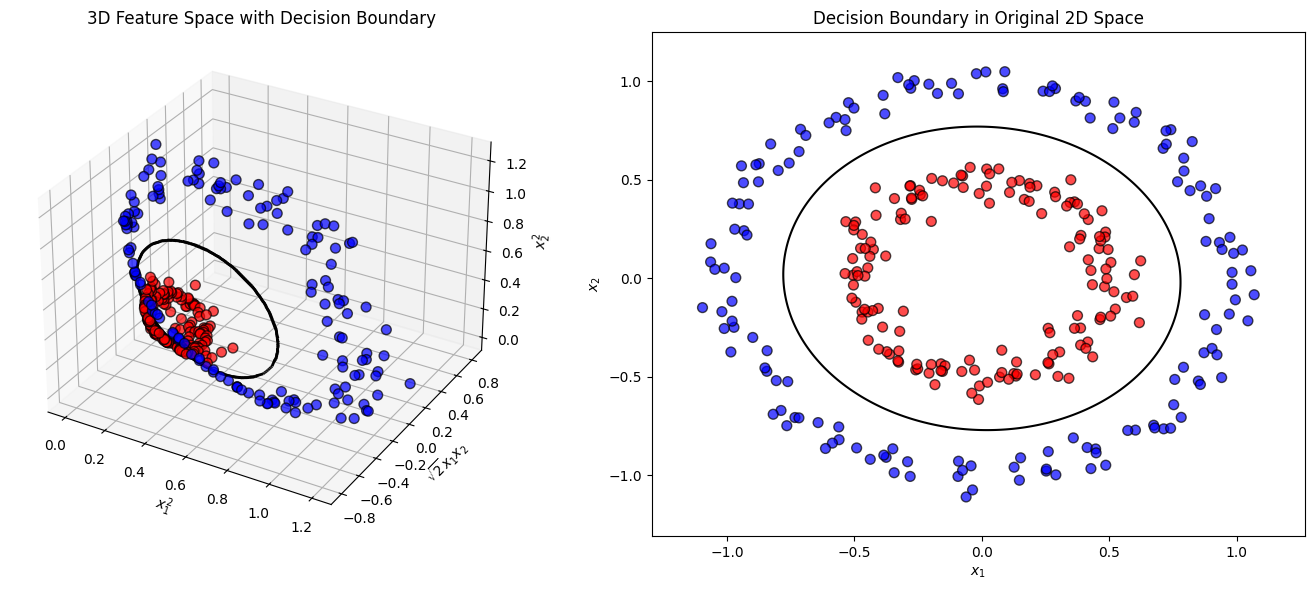

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection

# 1. Generate data
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)
y = np.where(y == 0, -1, 1)

# 2. Train SVM with polynomial kernel
clf = SVC(kernel='poly', degree=2, C=1.0, gamma=1)
clf.fit(X, y)

# 3. Create meshgrid for decision function evaluation
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_decision = clf.decision_function(grid)

# 4. Define phi mapping
def phi(x):
    return np.array([x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2])

phi_X = np.array([phi(x) for x in X])
phi_grid = np.array([phi(x) for x in grid])

# 5. Mask for decision boundary (near 0)
contour_mask = np.isclose(grid_decision, 0, atol=0.01)
radii = np.linalg.norm(grid, axis=1)
outer_ring_mask = contour_mask & (radii > 0.35)
boundary_points = phi_grid[outer_ring_mask]

# 6. Sort points by angle to create a connected ring
xy = grid[outer_ring_mask]
angles = np.arctan2(xy[:, 1], xy[:, 0])
sorted_idx = np.argsort(angles)
boundary_points_sorted = boundary_points[sorted_idx]

# 7. Create line segments for 3D LineCollection
segments = np.array([[boundary_points_sorted[i], boundary_points_sorted[i + 1]]
                     for i in range(len(boundary_points_sorted) - 1)])

# 8. Plotting
fig = plt.figure(figsize=(14, 6))

# --- 3D plot ---
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2],
            c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7)

# Decision boundary as a ring
if len(segments) > 0:
    lc = Line3DCollection(segments, colors='k', linewidths=2)
    ax1.add_collection3d(lc)

ax1.set_title('3D Feature Space with Decision Boundary')
ax1.set_xlabel('$x_1^2$')
ax1.set_ylabel('$\\sqrt{2} x_1 x_2$')
ax1.set_zlabel('$x_2^2$')

# --- 2D plot ---
ax2 = fig.add_subplot(122)
ax2.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7)
Z2 = grid_decision.reshape(xx.shape)
ax2.contour(xx, yy, Z2, levels=[0], colors='k')
ax2.set_title('Decision Boundary in Original 2D Space')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')

plt.tight_layout()
plt.show()


We can observe that 3d points is kind of circle-ish, but it's more irregular. On 2d plane they clearly form circles.
Now we can smoothly go to ...

# **Secondary question**
---------------------

# Why a 3D Hyperplane Becomes a Circular/Elliptical Boundary in 2D?

1. **Nonlinear mapping:** The degree-2 polynomial kernel uses the mapping  
   $Φ(x_{1}, x_{2}) = [x_{1}^2, \sqrt{2}x_{1}x_{2}, x_{2}^2]$,  
   which transforms 2D points to a 3D paraboloid (a curved surface).

2. **Projection back to 2D:** Mathematically, the 3D equation

   \begin{align*}
   & w_{1}x_{1}^2 + w_{2}\sqrt{2}x_{1}x_{2} + w_{3}x_{2}^2 + b = 0
   \end{align*}

   becomes

   \begin{align*}
   & w_{1}x_{1}^2 + w_{2}x_{1}x_{2} + w_{3}x_{2}^2 + b = 0.
   \end{align*}

   This equation describes a **circle**, **ellipse**, or another **conic section** in 2D, depending on the coefficients.

3. **We can come up with geometric interpretation:**
Transformed data lies on a paraboloid. The intersection of a plane with a paraboloid produces an ellipse or circle (like cutting a cylinder diagonally). This intersection curve, projected back to 2D, becomes the decision boundary.
